In [1]:
%%time
%load_ext autoreload

from analysis_utils import *
from joblib import Parallel, delayed
import multiprocessing  
import numpy as np
import pandas as pd

#Growth rate = 3.0
#Computes the translation latencies from our model with simulations containing
#1 to 14 cognate ternary complexes in the voxel (14 to 42 not included because
#the probability of voxels with that number of cognates is ~0)
path = "/Users/Akshay/Documents/tRNAShuffle/data/"
ensmbl_latency_dict = dict()
rxndiff=dict()
scalingFactor = 200
NR_scaledrates = {'k1r':718*200/scalingFactor,'k2f':1475*200/scalingFactor,'k2r_nr':1120*200/scalingFactor,'k3_nr':6*200/scalingFactor,'k4':209*200/scalingFactor}


data = "191003_2210/"
for i in range(1,7):
    sim_i = computeTransportRxnTimes(path+data,100*(i-1),100*(i-1)+100,cogtRNANum=i, ribosomeNum = 7,scaling=scalingFactor,NR_scaling = NR_scaledrates)
    ensmbl_latency_dict[i] = (CellLatencies(sim_i))

data = "191105_0908/"
for i in range(7,14):
    sim_i = computeTransportRxnTimes(path+data, 100*(i-1-6),100*(i-1-6)+100,cogtRNANum=i, ribosomeNum = 7,scaling=scalingFactor,NR_scaling = NR_scaledrates)
    ensmbl_latency_dict[i] = (CellLatencies(sim_i))

Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
CPU times: user 1min 46s, sys: 1.61 s, total: 1min 47s
Wall time: 1min 49s


In [148]:
#Experimentally obtained codon usage frequencies and tRNA abundances at growth rate = 2.5 dbl/hr
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
ptRNA_dict, pcodon_dict, codon_dict, codon_labels, pCodon = cognateDistrib(gr25_ptRNA,gr25_pCodon,True)

In [149]:
pCodon_zeros= np.zeros(len(gr25_pCodon))
codon_elongation_latency = list()
for i in range(len(pCodon_zeros)):
    pCodon_zeros= np.zeros(len(gr25_pCodon))
    pCodon_zeros[i] = 1
    codon_elongation_latency.append(computeElongationLatency(gr25_ptRNA,pCodon_zeros,ensmbl_latency_dict)[0][0])
codon_elongt = dict(zip(codon_labels, codon_elongation_latency))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61


In [ ]:
#Gene-specific analysis of elongation latency using E. coli genome

In [255]:
from Bio import SeqIO
from Bio.Seq import Seq
import pandas as pd
from collections import Counter
import numpy as np


# Go through each gene in the genome and break it down into codons
i = 0
gene_map = {}
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']
for seq_record in SeqIO.parse("/Users/akshay/Documents/TranslationDynamics/data/All_genes_of_E._coli_K-12_substr._MG1655-2.fa", "fasta"):
    sequence = str(seq_record.seq).replace('T','U')
    sequence = [sequence[i:i+3] for i in range(0, len(sequence), 3)]
    gene_map[seq_record.id] = sequence
print(len(gene_map))


#Create dictionary of gene name and its description, so that we can delete any genes that encode RNA for direct use
#(e.g., tRNA or rRNA) instead of mRNA
gene_type = pd.read_csv('/Users/akshay/Documents/TranslationDynamics/data/Gene_Name_from_All_genes_of_E._coli_K-12_substr._MG1655-2.txt',sep='\t')
gene_type_map = dict(zip(gene_type.AllGenes,gene_type.Geneproducts))

del_count = 0
for i,key in enumerate(gene_type_map.keys()):
    try:
        if('RNA' in gene_type_map[key]):
           del gene_map[key]
           del_count +=1
    except:
        nothing = 0
print("Removed ", del_count, " RNA species")
print(len(gene_map))

#Go through each gene and, for each codon in that gene, add its elongation latency and then compute
#the avg elongation latency for the gene. Remove hypothetical genes and other genes with nucleotide lenghts
#that aren't divisible by 3 (typically a predicted or disproven gene)

deleted = list()
gene_latency = {}
for gene in gene_map:
    elongt = 0
    gene_ok = True
    stops = 0
    for codon in gene_map[gene]:
        if codon != "UAA" and codon != "UAG":
            try:
                elongt += codon_elongt[codon]
            except:
                gene_ok = False
        else:
            stops +=1
    if gene_ok:
        elongt = elongt/(len(gene_map[gene])-stops)
        gene_latency[gene] = elongt
    else:
        deleted.append(gene)
for gene in deleted:
    del gene_map[gene]
    
print("Removed ", len(deleted), " non-divisible by three genes")
print(len(gene_latency))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Removed  81  non-divisible by three genes
4277


Text(0, 0.5, 'Probability Density')

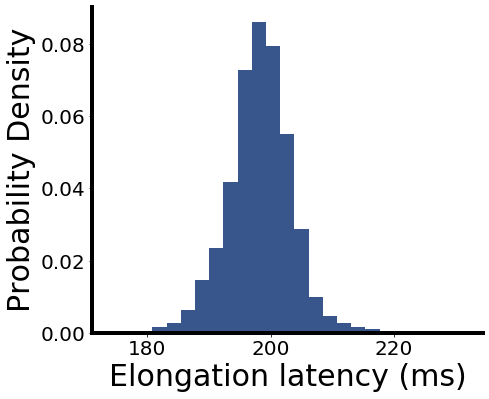

In [199]:
#Plot the elongation latency of each gene
fig,ax = plt.subplots(figsize=(7,6))

hist=ax.hist(gene_latency.values(),color='#39568CFF',bins=25,density=True)


ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.set_xlabel('Elongation latency (ms)',size=30)
ax.set_ylabel('Probability Density',size=30)

In [308]:
from Bio import SeqIO
from Bio.Seq import Seq
import pandas as pd
from collections import Counter
import numpy as np

#Go through each gene and compute the frequency distribution for all possible elongation codons
i = 0
gene_map = {}
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']
for seq_record in SeqIO.parse("/Users/akshay/Documents/TranslationDynamics/data/All_genes_of_E._coli_K-12_substr._MG1655-2.fa", "fasta"):
    sequence = str(seq_record.seq).replace('T','U')
    sequence = [sequence[i:i+3] for i in range(0, len(sequence), 3)]
    counter = Counter(sequence)

    pCodon = dict(zip(codon_tags,[0]*len(codon_tags)))
    for key in pCodon:
        pCodon[key] = counter[key]
    pCodon = np.array(list(pCodon.values()))
    gene_map[seq_record.id] = pCodon/sum(pCodon)
print(len(gene_map))

#Delete genes corresponding to RNA
gene_type = pd.read_csv('/Users/akshay/Documents/TranslationDynamics/data/Gene_Name_from_All_genes_of_E._coli_K-12_substr._MG1655-2.txt',sep='\t')
gene_type_map = dict(zip(gene_type.AllGenes,gene_type.Geneproducts))

del_count = 0
for i,key in enumerate(gene_type_map.keys()):
    try:
        if('RNA' in gene_type_map[key]):
           del gene_map[key]
           del_count +=1
    except:
        nothing = 0

print("Removed ", del_count, " RNA species")
print(len(gene_map))

/Users/akshay/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


4707
Removed  349  RNA species
4358


Elongation latency:  198.4367893577719


Text(0, 0.5, 'Elongation latency')

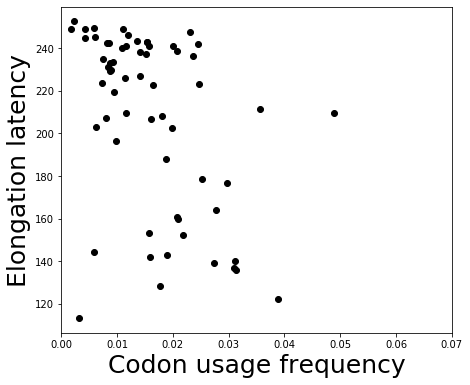

In [309]:
#Plot the frequency of individual codons (computed from all genes in genome) vs. their elongation latency
genome_freq = np.zeros(len(codon_tags))
for i,gene in enumerate(gene_map):
    if not np.isnan(gene_map[gene]).any():
        genome_freq += gene_map[gene]
genome_freq = genome_freq/sum(genome_freq)
genome_pcodon_dict = dict(zip(codon_labels, genome_freq))

pcodon_sorted = sorted(genome_pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codon_sorted = [x[0] for x in pcodon_sorted]
pcodon_sorted = [x[1] for x in pcodon_sorted]

freq_sorted = [codon_elongt[codon] for codon in codon_sorted]

fig,ax = plt.subplots(figsize=(7,6))
ax.scatter(pcodon_sorted,elongt_sorted,color='black',label = 'Protein-coding codon')
ax.set_xlim(0,0.07)

elongt = 0
for i,codon in enumerate(genome_pcodon_dict):
    elongt += genome_pcodon_dict[codon]*codon_elongt[codon]
print('Elongation latency: ', elongt)
ax.set_xlabel('Codon usage frequency',size=25)
ax.set_ylabel('Elongation latency',size=25)

Elongation latency:  187.45392657252887


Text(0, 0.5, 'Elongation latency')

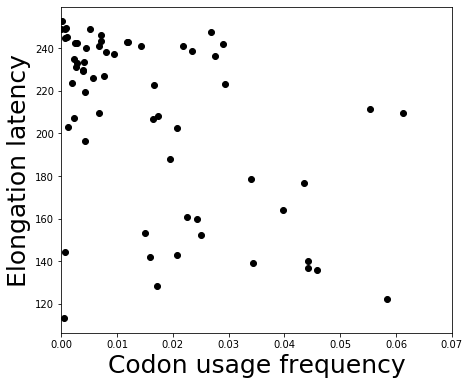

In [305]:
#Plot the frequency of individual codons (based on proteome from Dong et al. data) vs. their elongation latency

#Sort codons by how frequent they are (data from Dong et al.)
pcodon_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codon_sorted = [x[0] for x in pcodon_sorted]
pcodon_sorted = [x[1] for x in pcodon_sorted]

#Sort the elongation latency for individual codons and plot
elongt_sorted = [codon_elongt[codon] for codon in codon_sorted]

fig,ax = plt.subplots(figsize=(7,6))
ax.scatter(pcodon_sorted,elongt_sorted,color='black',label = 'Protein-coding codon')
ax.set_xlim(0,0.07)

#Average elongation time given the Dong et al. reported codon distribution
elongt = 0
a = dict(zip(codon_sorted, pcodon_sorted))
for i,codon in enumerate(a):
    elongt += a[codon]*codon_elongt[codon]
print('Elongation latency: ', elongt)
ax.set_xlabel('Codon usage frequency',size=25)
ax.set_ylabel('Elongation latency',size=25)

In [ ]:
#Compute elongation latencies using transcriptomics data

In [288]:
transcriptome = pd.read_csv('./data/tables/srep45303-s9.csv')
transcriptome = transcriptome.head(4196)
transcriptome_dict = dict(zip(transcriptome['gene_name'],transcriptome['baseMean']))

failed_counter = 0
transcriptome_elongt = list()
for key in transcriptome_dict:
    try:
        for i in range(round(transcriptome_dict[key])):
            transcriptome_elongt.append(gene_latency[key])
        if(gene_latency[key]<180):
            print(key)
        #print(gene_latency[key])
    except:
        #print(key)
        failed_counter+=1

rpsU
rplO
rplL


192.83802566077256


Text(0, 0.5, 'Probability Density')

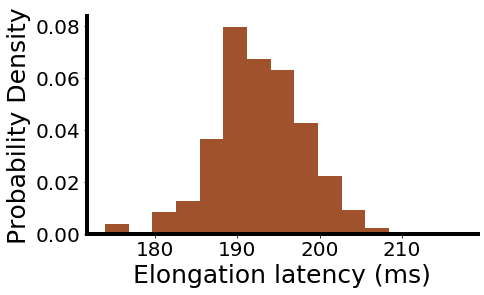

In [323]:
#Plot the elongation latency of each gene
fig,ax = plt.subplots(figsize=(7,4))

hist=ax.hist(transcriptome_elongt,color='sienna',bins=15,density=True)
print(np.average(transcriptome_elongt))

ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.set_xlabel('Elongation latency (ms)',size=25)
ax.set_ylabel('Probability Density',size=25)

In [312]:
transcriptome = pd.read_csv('./data/tables/srep45303-s9.csv')
transcriptome = transcriptome.head(4196)
transcriptome_dict = dict(zip(transcriptome['gene_name'],transcriptome['baseMean']))

failed_counter = 0
for key in transcriptome_dict:
    try:
        a=gene_latency[key]
        #print(gene_latency[key])
    except:
        print(key)
        failed_counter+=1


In [290]:
print(list(gene_type['AllGenes']))

["3'ETS-<i>leuZ</i>", 'aaaD', 'aaaE', 'aaeA', 'aaeB', 'aaeR', 'aaeX', 'aas', 'aat', 'abgA', 'abgB', 'abgR', 'abgT', 'abpA', 'abpB', 'abrB', 'accA', 'accB', 'accC', 'accD', 'aceA', 'aceB', 'aceE', 'aceF', 'aceK', 'ackA', 'ackB', 'acnA', 'acnB', 'acpH', 'acpP', 'acpS', 'acpT', 'acrA', 'acrB', 'acrD', 'acrE', 'acrF', 'acrR', 'acrZ', 'acs', 'actP', 'ada', 'add', 'adeD', 'adeP', 'adeQ', 'adhE', 'adhP', 'adiA', 'adiC', 'adiY', 'adk', 'aegA', 'aer', 'aes', 'afuB', 'afuC', 'agaA', 'agaB', 'agaC', 'agaD', 'agaI', 'agaR', 'agaS', 'agaV', 'agaW', 'agp', 'agrA', 'agrB', 'ahpC', 'ahpF', 'ahr', 'aidB', 'ais', 'alaA', 'alaB', 'alaC', 'alaE', 'alaS', 'alaT', 'alaU', 'alaV', 'alaW', 'alaX', 'aldA', 'aldB', 'alkA', 'alkB', 'allA', 'allB', 'allC', 'allD', 'allE', 'allR', 'allS', 'alpA', 'alr', 'alsA', 'alsB', 'alsC', 'alsE', 'alsK', 'alsR', 'alx', 'amiA', 'amiB', 'amiC', 'amiD', 'amn', 'ampC', 'ampD', 'ampE', 'ampG', 'ampH', 'amtB', 'amyA', 'anmK', 'ansA', 'ansB', 'ansP', 'apaG', 'apaH', 'aphA', 'appA', 

In [301]:
gene_type_map['nudC']

'RNA decapping hydrolase'